In [25]:
import pandas as pd
import csv
import numpy as np
import nltk
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_data = pd.read_csv(r"C:\Users\ashis\Fifa.csv")
file_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Here we are specifying the player stats columns to be the following. These are the majority of player statistics we found in the dataset to be used for further analysis.

In [26]:
skill_cols = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
dfskills = file_data[skill_cols]
len(dfskills.columns)

34

Using a heatmap of the entire dataset, we notice that there are variables that are correlated. We are lead to believe that similar variables may have the same impact on player worth as certain others. A method must be implemented to distinguish variables with more weight in the study to further narrow our scope.

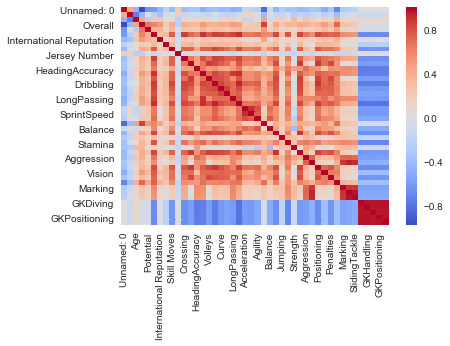

In [27]:
hist_data = pd.read_csv(r"C:\Users\ashis\Fifa_hist.csv")
cordf=hist_data.corr()
sns.heatmap(cordf, annot=False, cmap='coolwarm')

We run a clustermap for our data to further visualize which variables are the most correlated. From the map, it seems that Crossing, BallControl, Special, Vision, Curve, Skill Moves, and Positioning are the most positively correlated with one another. Redundancies may occur in our model of the neural net, so we need to now find a way to limit the scope of the project to a select few variables.

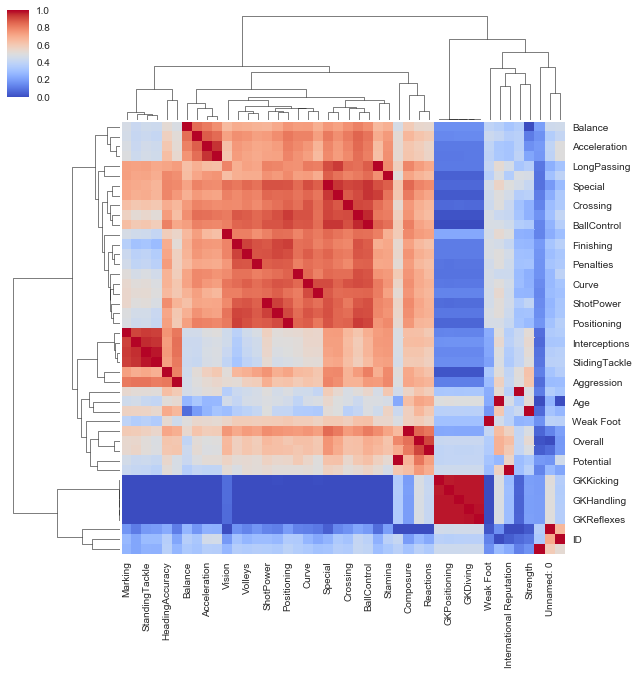

In [28]:
sns.clustermap(cordf,cmap='coolwarm',annot=False,standard_scale=1)

In order to reduce the dimensions of our dataset and observe which variables are the most important in predicting player worth, principle component analysis is run with 5 dimensions. This will allow us to obtain the top 5 variables that are the most important.

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0,0.5,'Second Principle Component')

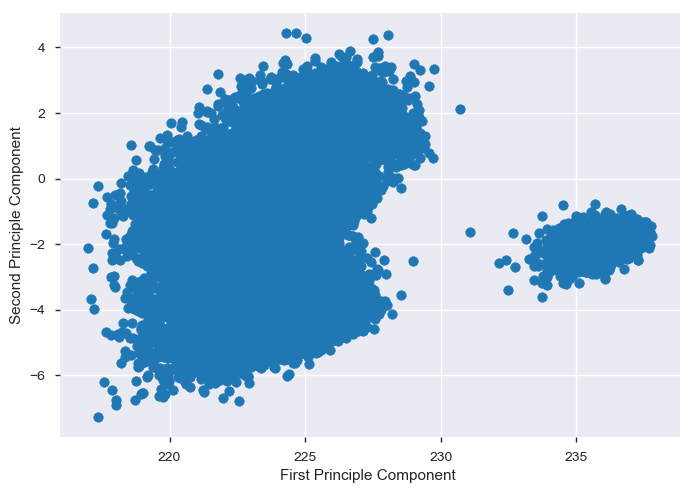

In [31]:
dfskills = file_data[skill_cols]
import pandas_profiling
pandas_profiling.ProfileReport(dfskills)
dfskills.dropna(inplace=True)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
#Scaling 
scaler = StandardScaler()
scaler.fit(dfskills)
scaled_data = scaler.transform(dfskills)
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(dfskills)
x_pca = pca.transform(scaled_data)
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('First Principle Component ')
plt.ylabel('Second Principle Component')

Furthermore, we see that we reduce the dimensions of our dataset from 34 to 5.

In [32]:
scaled_data.shape

(18159, 34)

In [33]:
x_pca.shape

(18159, 5)

Although this plot is not interpretable due to the high number of dimensions, we are able to obtain the weights for all of the PCA component features.


In [18]:
# Makes data frame with weights for all the features in the PCA components 
df_comp = pd.DataFrame(pca.components_, columns = skill_cols)
df_comp

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.213781,-0.199029,-0.170953,-0.180327,-0.187116,-0.233332,-0.207770,-0.184836,-0.167166,-0.213068,...,-0.162662,-0.100765,-0.153534,-0.159731,-0.148083,0.206742,0.197214,0.191677,0.197980,0.209600
1,-0.044365,-0.257702,0.118866,0.012189,-0.191272,-0.118889,-0.127813,-0.100281,0.048896,-0.051269,...,-0.146040,-0.007583,0.349162,0.411694,0.410859,-0.054076,-0.052350,-0.051476,-0.051457,-0.055210
2,0.118211,0.006830,-0.122504,0.113647,0.080244,-0.002938,0.178926,0.216949,0.218774,0.034561,...,0.020063,0.224732,0.072889,0.093496,0.076625,0.320714,0.307523,0.299810,0.313129,0.327115
3,-0.221269,0.175101,0.392049,-0.017464,0.156944,-0.095186,-0.074593,-0.028490,-0.082325,-0.000729,...,0.177992,0.081413,-0.064119,-0.101002,-0.135418,-0.062345,-0.057691,-0.054798,-0.056654,-0.060639
4,0.078932,-0.032082,-0.178243,0.059752,0.010217,0.003096,0.151228,0.258002,0.148407,0.004019,...,0.044765,-0.124201,0.024416,0.073223,0.069103,-0.122949,-0.114045,-0.108807,-0.122620,-0.126169


Now, a weighted average is taken with the feature weights obtained in the previous step in order to determine the top five most important variables. This average is taken since each principle component have different magnitudes and a single one cannot represent one feature entirely. We find that StandingTackle, SlidingTackle, Longshots, Finishing, and Interceptions are the most important variables. These will be used as inputs in the neural network.

In [34]:
vals=[]
vals = pca.explained_variance_ratio_
df_adjusted  = df_comp.mul(vals, axis=0)
absolute_df_adjusted = df_adjusted.abs()
rankings = absolute_df_adjusted.sum(axis = 0)
rankings.sort_values(ascending=False)

StandingTackle     0.178074
SlidingTackle      0.171717
LongShots          0.170494
Finishing          0.169566
Interceptions      0.168668
Positioning        0.165710
Dribbling          0.159266
Curve              0.159241
Marking            0.159049
GKReflexes         0.154148
Volleys            0.153420
GKDiving           0.151938
Crossing           0.148493
HeadingAccuracy    0.147979
GKPositioning      0.145773
ShotPower          0.145526
Aggression         0.145272
GKHandling         0.145005
FKAccuracy         0.144029
GKKicking          0.140986
BallControl        0.133021
Penalties          0.129593
Acceleration       0.127039
LongPassing        0.124164
Agility            0.121764
SprintSpeed        0.121223
Stamina            0.121081
Vision             0.114141
ShortPassing       0.113856
Balance            0.104759
Composure          0.078397
Strength           0.064340
Jumping            0.048489
Reactions          0.048410
dtype: float64

We were curious in regards to how these variables differ in the acclaimed top five FIFA teams of 2019. Violin plots are thus made to compare the distribution and means of teams in Belgium, France, Brazil, England, and Croatia. For standing tackles, we observe that Brazil, Croatia, and France are well above the average, whereas Belgium and Croatia are approximately average.

48.36553732133404

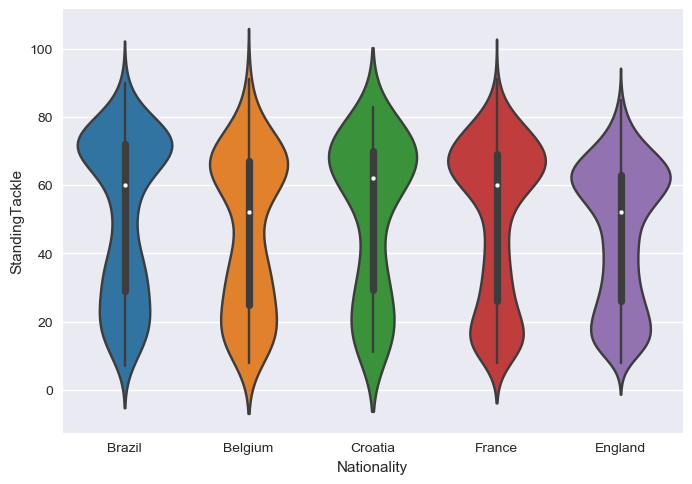

In [20]:
newdf = hist_data[(hist_data['Nationality']=='Belgium') | (hist_data['Nationality']== 'France') | (hist_data['Nationality']=='Brazil') | (hist_data['Nationality']=='England') | (hist_data['Nationality']=='Croatia')]
sns.set_style('darkgrid')
sns.violinplot(x='Nationality',y='StandingTackle',data=newdf)
newdf['StandingTackle'].mean()

For sliding tackles, we observe the same pattern as standing tackles. All of these plots seem to be bimodal.

46.36130227633669

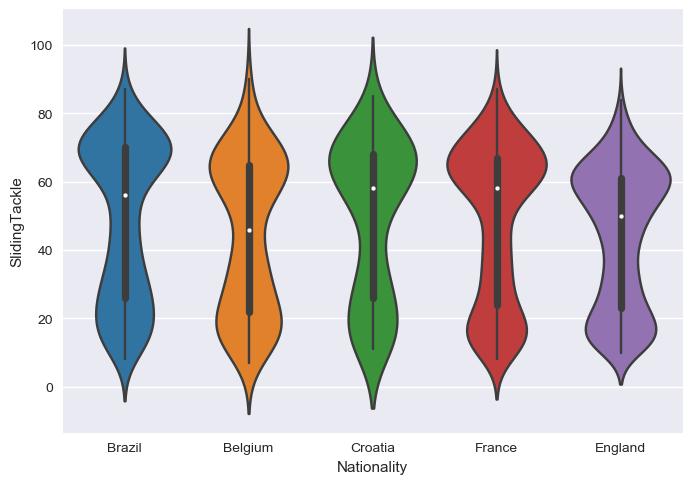

In [21]:
sns.violinplot(x='Nationality',y='SlidingTackle',data=newdf)
newdf['SlidingTackle'].mean()

It seems that Brazil and Croatia are dominant in heading accuracy. The plots all seem to be skewed left and slightly bimodal as well.

53.398094229751194

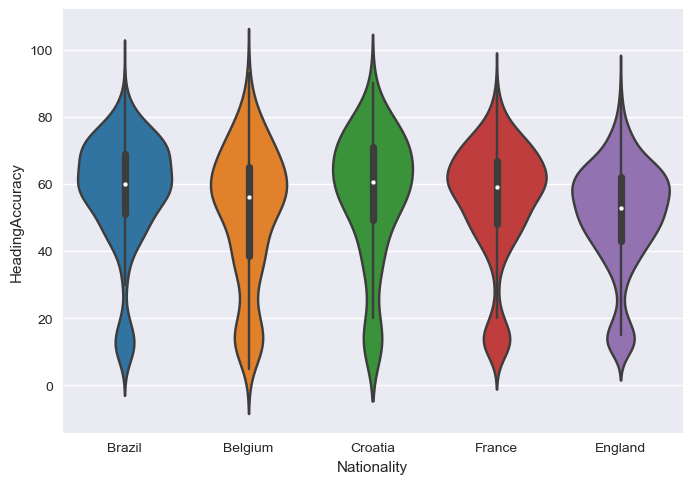

In [22]:
sns.violinplot(x='Nationality',y='HeadingAccuracy',data=newdf)
newdf['HeadingAccuracy'].mean()

For longshots, it seems that Brazil and Belgium are the best and most above average in comparison to the other teams. The distributions seem to be a lot more uniform for these 5 teams as well.

47.88459502382213

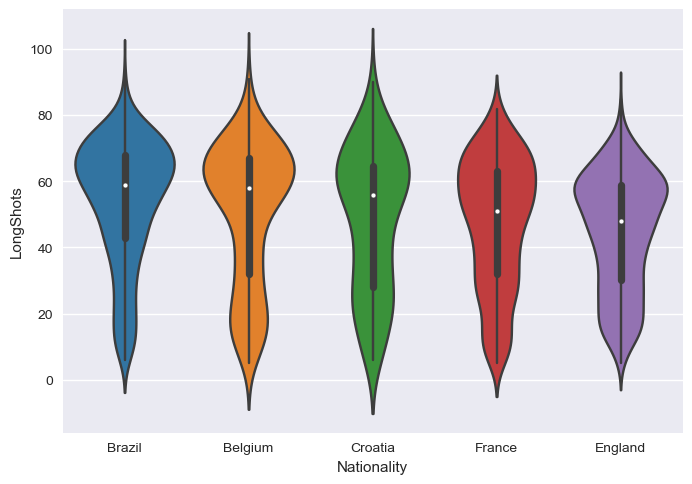

In [23]:
sns.violinplot(x='Nationality',y='LongShots',data=newdf)
newdf['LongShots'].mean()

The finishing player statistic seems to follow the same distribution and ranking pattern as long shots. Overall, we found it interesting that the distributions for each player statistic were similar for all teams per plot.

46.33774483853891

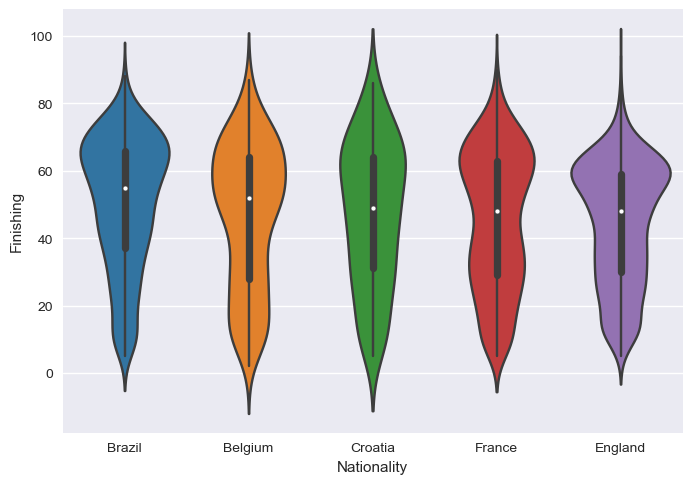

In [24]:
sns.violinplot(x='Nationality',y='Finishing',data=newdf)
newdf['Finishing'].mean()